<a href="https://colab.research.google.com/github/shafiraamkhazahra/Tugas-Python-11/blob/main/Shafira_Amkha_Zahra_TugasPython11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

'00 Pengantar.pdf'
'01 Barisan dan Deret.pdf'
 02-hirarki_sentral_telepon.ppt
'02 Persamaan Diferensial Orde I.pdf'
'03 Persamaan Diferensial Orde II.pdf'
'04 Fungsi Vektor.pdf'
'05 Fungsi Dua Peubah.pdf'
'06 Integral Lipat Dua.pdf'
'07 Integral Lipat Tiga.pdf'
'08 Integral Garis dan Permukaan.pdf'
 0-introduction.pptx
'1101194111 Registrasi _ Telkom University.PDF'
'1101194111_SHAFIRA AMKHA ZAHRA_TUGAS 1A.m4a'
'1101194111_Shafira Amkha Zahra_Tugas Induksi Medan Magnet (1).pdf'
'1101194111_Shafira Amkha Zahra_Tugas Induksi Medan Magnet.pdf'
'[1] Barisan dan Deret.pptx'
 1UhgSkJiJ7DWyQbYVnosN9vvcLrsKZa0E.pdf
 20190116_121744.jpg
'2019-08-13 11.59.47 1.jpg'
 20200718_100015.jpg
 20200801_200901.jpg
 20201017_203300.jpg
'[2] Fungsi Vektor.pptx'
'33228_30145_RPS PKn 3 agustus 2019 fix.pdf'
'[3] Fungsi Dua Peubah.pptx'
'[4] Teknik Pengintegralan.pptx'
'[5] Integral Lipat 2.pptx'
'[6] Integral Lipat 3.pptx'
'97856_Prezi Iwakmas Final 4.0Prezzi.zip'
'97858_Prezi Telyu Final 3.0.zip'
'ABSENSI 

In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("tugaspython11")
data = []
labels = []

[INFO] loading images...


In [9]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [10]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [11]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [12]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [13]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [34]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(9, (4,4), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(18, (4,4), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 61, 61, 9)         441       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 9)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 18)        2610      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 18)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3042)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               304300    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [35]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [36]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [37]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [38]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 0s 18ms/step - loss: 1.6241 - accuracy: 0.3242 - val_loss: 1.5380 - val_accuracy: 0.3699
Epoch 2/25
14/14 [==============================] - 0s 7ms/step - loss: 1.3875 - accuracy: 0.4726 - val_loss: 1.2713 - val_accuracy: 0.4521
Epoch 3/25
14/14 [==============================] - 0s 6ms/step - loss: 1.1586 - accuracy: 0.5411 - val_loss: 1.2215 - val_accuracy: 0.4658
Epoch 4/25
14/14 [==============================] - 0s 7ms/step - loss: 0.9727 - accuracy: 0.6416 - val_loss: 1.0970 - val_accuracy: 0.6164
Epoch 5/25
14/14 [==============================] - 0s 7ms/step - loss: 0.9328 - accuracy: 0.6461 - val_loss: 1.0059 - val_accuracy: 0.6233
Epoch 6/25
14/14 [==============================] - 0s 6ms/step - loss: 0.7919 - accuracy: 0.7192 - val_loss: 0.9199 - val_accuracy: 0.6370
Epoch 7/25
14/14 [==============================] - 0s 7ms/step - loss: 0.6888 - accuracy: 0.7557 - val_loss: 0.9018 - val_accuracy: 0.6301
Epoch 8/25
14/14 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


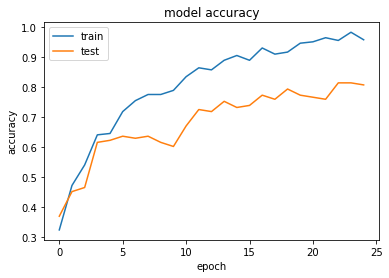

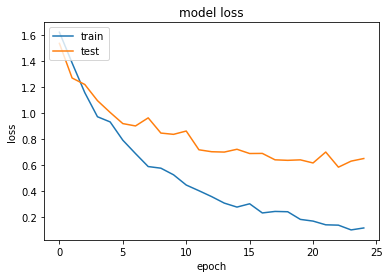

In [39]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.71      0.83      0.77        18
      GMB_02       0.74      0.79      0.76        33
      GMB_03       0.93      0.82      0.87        33
      GMB_04       0.75      0.87      0.81        31
      GMB_05       0.92      0.74      0.82        31

    accuracy                           0.81       146
   macro avg       0.81      0.81      0.81       146
weighted avg       0.82      0.81      0.81       146



In [41]:
import cv2
import matplotlib.pyplot as plt
image1='daun.jpg'

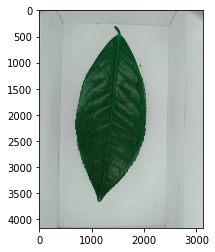

In [42]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [43]:
image_testing = Image.open('daun.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [44]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [45]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.37618303 0.48627672 0.13754031]]
['GMB_02']
